In [1]:
# 지도를 그릴 수 있는 라이브러리 설치
!pip install folium


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install openpyxl


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# 판다스 라이브러리를 pd라는 이름으로 임포트
import pandas as pd

# 엑셀 파일 경로를 변수에 저장 (현재 실행 중인 파이썬 파일과 같은 폴더에 있어야 함)
filePath = r'고등교육기관 하반기 주소록(2024).xlsx'

# openpyxl 엔진을 사용하여 엑셀 파일을 읽어 DataFrame으로 저장
df_from_excel = pd.read_excel(filePath, engine='openpyxl')

# 5번째 행(인덱스 4)을 컬럼명으로 설정
df_from_excel.columns = df_from_excel.loc[4].tolist()

# 0번째부터 4번째까지의 불필요한 행 제거 (헤더 설정 전의 내용)
df_from_excel = df_from_excel.drop(index=list(range(0, 5)))

# 데이터프레임의 상위 5개 행 출력
print(df_from_excel.head())

# '학교명' 컬럼의 모든 값을 배열 형태로 출력
print(df_from_excel['학교명'].values)

# '주소' 컬럼의 모든 값을 배열 형태로 출력
print(df_from_excel['주소'].values)


     연도 학교종류  시도     행정구        학교명                              학교명(영문)  \
5  2024  대학교  강원  강원 강릉시  국립강릉원주대학교  Gangneung-Wonju National University   
6  2024  대학교  강원  강원 원주시  국립강릉원주대학교  Gangneung-Wonju National University   
7  2024  대학교  강원  강원 춘천시      강원대학교          Kangwon National University   
8  2024  대학교  강원  강원 삼척시      강원대학교          Kangwon National University   
9  2024  대학교  대구   대구 북구      경북대학교        Kyungpook National University   

         본분교    학교상태  설립   우편번호                                       주소  \
5  본교(제1캠퍼스)  학교명 변경  국립  25457             강원도 강릉시 죽헌길 7 (지변동, 강릉원주대학교)   
6  본교(제2캠퍼스)  학교명 변경  국립  26403  강원도 원주시 흥업면 남원로 150 (흥업리, 강릉원주대학교원주캠퍼스)   
7  본교(제1캠퍼스)      기존  국립  24341             강원도 춘천시 강원대학길 1 (효자동, 강원대학교)   
8  본교(제2캠퍼스)      기존  국립  25913         강원도 삼척시 중앙로 346 (교동, 강원대학교삼척캠퍼스)   
9  본교(제1캠퍼스)      기존  국립  41566             대구광역시 북구 대학로 80 (산격동, 경북대학교)   

           전화번호          팩스번호                홈페이지  
5  033-640-7001  033-643-7110     

In [9]:
# requests 라이브러리를 이용하여 API 요청을 보냄
import requests

# VWorld 주소 API의 기본 URL
url = 'http://api.vworld.kr/req/address?'

# API 호출에 필요한 기본 파라미터 문자열 구성
params = 'service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type='

# 도로명 주소용 타입
road_type = 'ROAD'   # 도로명 주소를 사용
road_type2 = 'PARCEL' # 지번 주소를 사용 (사용하지 않지만 참고용으로 정의됨)

# 주소와 API 키를 붙이기 위한 문자열
address = '&address='
keys = '&key='

# VWorld API의 개인 인증키 (자신의 키로 교체해야 함)
primary_key = '5DEBAFCE-0518-3F5C-958D-CD7839006BBC'

# 주소를 입력받아 해당 주소의 위도(x), 경도(y) 좌표를 반환하는 함수 정의
def request_geo(road):
    # 전체 요청 URL 생성
    page = requests.get(url + params + road_type + address + road + keys + primary_key)
    # 받은 응답을 JSON 형식으로 파싱
    json_data = page.json()
    
    # 응답 상태가 'OK'이면 좌표 정보 추출
    if json_data['response']['status'] == 'OK':
        x = json_data['response']['result']['point']['x']  # 경도
        y = json_data['response']['result']['point']['y']  # 위도
        return x, y
    else:
        # 실패 시 기본값 (0, 0) 반환
        x = 0
        y = 0
        return x, y

# 예시 주소로 함수 호출 (한국폴리텍대학 광주 캠퍼스 주소)
x, y = request_geo("광주광역시 북구 하서로 85")

# 결과 출력
print(f'x값: {x}')
print(f'y값: {y}')


x값: 126.880454740
y값: 35.184572262


In [14]:
import pandas as pd
import requests
from openpyxl import load_workbook
from openpyxl import Workbook
import re


filePath = r'고등교육기관 하반기 주소록(2024).xlsx'
df_from_excel = pd.read_excel(filePath,engine='openpyxl')
df_from_excel.columns = df_from_excel.loc[4].tolist()
df_from_excel = df_from_excel.drop(index=list(range(0,5)))


url = 'http://api.vworld.kr/req/address?'
params = 'service=address&request=getcoord&version=2.0&crs=epsg:4326&refine=true&simple=false&format=json&type='
road_type = 'ROAD'   #도로명주소
road_type2 = 'PARCEL' #지번주소
address = '&address='
keys = '&key='
primary_key = '5DEBAFCE-0518-3F5C-958D-CD7839006BBC'

def request_geo(road):
    page = requests.get(url+params+road_type+address+road+keys+primary_key)
    json_data = page.json()
    if json_data['response']['status'] == 'OK':
        x = json_data['response']['result']['point']['x']
        y = json_data['response']['result']['point']['y']
        return x,y
    else:
        x = 0
        y = 0
        return x,y


try:
    wb = load_workbook(r"학교주소좌표.xlsx", data_only=True)
    sheet  = wb.active
except:
    wb = Workbook()
    sheet = wb.active

university_list = df_from_excel['학교명'].to_list()
address_list = df_from_excel['주소'].to_list()

for num,value in enumerate(address_list):
    addr = re.sub(r'\([^)]*\)', '', value)
    print(addr)
    x,y = request_geo(addr)
    sheet.append([university_list[num],addr,x,y])

wb.save(r"학교주소좌표.xlsx")

강원도 강릉시 죽헌길 7 
강원도 원주시 흥업면 남원로 150 
강원도 춘천시 강원대학길 1 
강원도 삼척시 중앙로 346 
대구광역시 북구 대학로 80 
대구 중구 국채보상로 680
경북 상주시 경상대로 2559
경상남도 진주시 진주대로 501 
경남 통영시 통영해안로 2
경남 창원시 의창구 차룡로48번길 54
충청남도 공주시 공주대학로 56 
충남 천안시 서북구 천안대로 1223-24
충남 예산군 예산읍 대학로 54
전북특별자치도 군산시 대학로 558 
경상북도 구미시 대학로 61 
전라남도 무안군 청계면 영산로 1666 
전남 목포시 해양대학로 91
부산광역시 남구 용소로 45 
부산광역시 금정구 부산대학로63번길 2 
경남 밀양시 삼랑진읍 삼랑진로 1268-50
경남 양산시 물금읍 부산대학로 49
서울특별시 관악구 관악로 1 
서울 종로구 대학로 103
서울특별시 관악구 관악로 1 
전라남도 순천시 중앙로 255 
경상북도 안동시 경동로 1375 
광주광역시 북구 용봉로 77 
전라남도 여수시 대학로 50 
전북특별자치도 전주시 덕진구 백제대로 567
전북특별자치도 익산시 고봉로 79
제주특별자치도 제주시 제주대학로 102 
경상남도 창원시 의창구 창원대학로 20 
대전광역시 유성구 대학로 99 
충청북도 청주시 서원구 충대로 1 
충청북도 청주시 흥덕구 강내면 태성탑연로 250 
서울특별시 송파구 양재대로 1239 
부산광역시 영도구 태종로 727 
충북 충주시 대소원면 대학로 50
충북 증평군 증평읍 대학로 61
경기 의왕시 철도박물관로 157
경상남도 진주시 동진로 33 
서울특별시 노원구 공릉로 232 
경기도 안성시 중앙로 327 
경기 평택시 삼남로 283
대전광역시 유성구 동서대로 125 
서울특별시 동대문구 서울시립대로 163 
인천광역시 연수구 아카데미로 119 
경상남도 김해시 삼계로 208 
경상북도 고령군 대가야읍 대가야로 1103 
경기도 부천시 원미구 지봉로 43 
서울특별시 서초구 반포대로 222 
서울특별시 종로구 창경궁로 

In [16]:
import pandas as pd
import folium

filePath = r'학교주소좌표.xlsx'
df_from_excel = pd.read_excel(filePath,engine='openpyxl',header=None)

df_from_excel.columns = ['학교이름','주소','x','y']

name_list = df_from_excel['학교이름'].to_list()
addr_list = df_from_excel['주소'].to_list()
position_x_list = df_from_excel['x'].to_list()
position_y_list = df_from_excel['y'].to_list()

map = folium.Map(location=[37,127],zoom_start=7)

for i in range(len(name_list)):
    if position_x_list[i] != 0:
        marker = folium.Marker([position_y_list[i],position_x_list[i]],
                            popup=name_list[i], 
                            icon = folium.Icon(color='blue'))
        marker.add_to(map) 

map.save(r'uni_map2.html')

# 결과물 확인

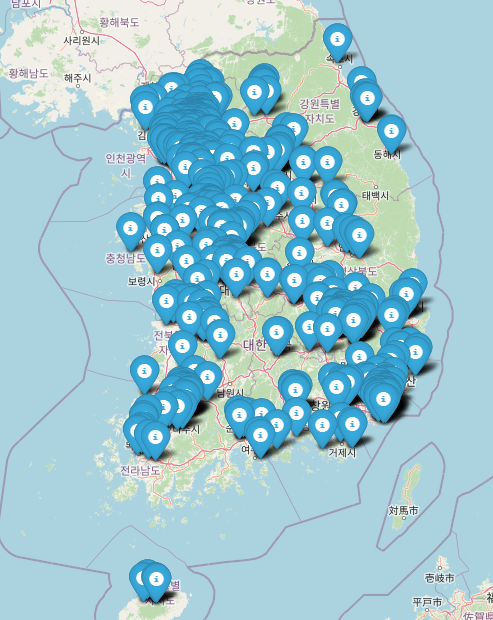

--------------------------

In [12]:
# folium 라이브러리를 사용하여 지도 시각화
import folium

# 기본 지도를 생성 (위치: 위도 35, 경도 126 / 줌 레벨 7)
map = folium.Map(location=[35, 126], zoom_start=7)

# 마커 객체 생성 (위치: 한국폴리텍V대학 광주캠퍼스 좌표)
marker = folium.Marker(
    [35.183778757, 126.880647243],  # 위도, 경도
    popup='한국폴리텍V대학 광주캠퍼스',  # 클릭 시 표시되는 팝업 텍스트
    icon=folium.Icon(color='blue')  # 파란색 아이콘 사용
)

# 마커를 지도에 추가
marker.add_to(map)

# 지도를 HTML 파일로 저장
map.save(r'poly_map1.html')


# 결과물 확인

# 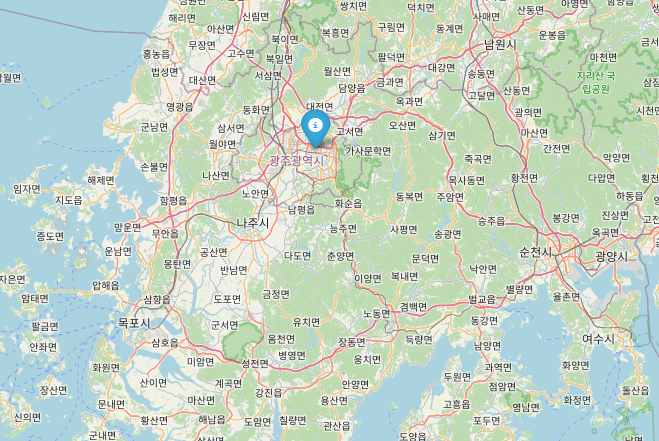